# Attempt to remove charging artifacts

Considers blocks of images centered at each pixel.

Performs directional FFT analysis to identify regions that appear to have charging artifacts. This seems to work reasonably well.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from icecream import ic
import napari

In [21]:
data =  tifffile.imread('2022-02-22_18_59_05_1_7_mode_0.tif')

In [22]:
data_crop = data[2000:3500,800:3000]

In [20]:
NV = napari.Viewer()

In [23]:
NV.add_image(data_crop)

<Image layer 'data_crop' at 0x2629d80b0d0>

Plan: divide image in blocks. Get directional FFT of each of them and stack resulting np.absolute images by frequency

Do directional FFT in y and average along x

In [24]:
def getDirFFTStackByFreq(data, blocksize=32, axis=0, normaliseuint8 = True):
    #For every point of image, get a block area of blocksize x blocksize
    # Do directional FFT (axis=0 y), np.absolute, average across x, ending up with a 1d-plot
    # Store data for that pixel
    ic()
    ic(data.shape)
    ic(blocksize)

    halfblocksize = int(blocksize/2)
    fftressize = halfblocksize+1

    resshape = (fftressize, data.shape[0], data.shape[1] )
    result = np.zeros( resshape , dtype=np.float32)

    axis1 = axis-1
    if axis1==-1:
        axis1 = 1
    
    for iy in range(halfblocksize, data.shape[0]-halfblocksize):
        ic(iy)
        for ix in range(halfblocksize, data.shape[1]-halfblocksize-1):
            datablock = data[iy-halfblocksize:iy+halfblocksize , ix-halfblocksize:ix+halfblocksize]
            #ic(datablock.shape)
            
            datablock_fft = np.fft.rfft(datablock, axis=axis)
            #ic(datablock_ffty.shape)
            datablock_fft_abs = np.absolute(datablock_fft)

            datablock_fft_abs_meanx = np.mean(datablock_fft_abs, axis=axis1)

            #ic(datablock_ffty_abs_meanx.shape)
            # if datablock_fft_abs_meanx.shape[0]==fftressize:
            #     result[:,iy,ix] = datablock_fft_abs_meanx
            # else:
            #     print(f"Error in size , iy:{iy}, ix:{ix} , datablock_fft_abs_meanx.shape[0]:{datablock_fft_abs_meanx.shape[0]}")
            result[:,iy,ix] = datablock_fft_abs_meanx
    
    result1 = result
    if normaliseuint8:
        #result1=np.zeros( result.shape, dtype=np.uint8)
        resmin = result.min()
        resmax = result.max()
        result1 =  ((result-resmin) / (resmax - resmin) *255).astype(np.uint8)

    return result1


In [25]:
# def getDirXFFTStackByFreq(data, blocksize=32):
#     #For every point of image, get a block area of blocksize x blocksize
#     # Do directional FFT (axis=0 y), np.absolute, average across x, ending up with a 1d-plot
#     # Store data for that pixel
#     ic()
#     ic(data.shape)
#     ic(blocksize)

#     fftressize = int(blocksize/2)+1

#     resshape = (fftressize, data.shape[0]-blocksize, data.shape[1]-blocksize )
#     result = np.zeros( (fftressize, data.shape[0]-blocksize, data.shape[1]-blocksize) )

#     for iy in range(0, data.shape[0]-blocksize):
#         ic(iy)
#         for ix in range(0, data.shape[1]-blocksize):
#             datablock = data[iy:iy+blocksize , ix:ix+blocksize]

#             datablock_fftx = np.fft.rfft(datablock, axis=1)
#             #ic(datablock_ffty.shape)
#             datablock_fftx_abs = np.absolute(datablock_fftx)
#             datablock_fftx_abs_meanx = np.mean(datablock_fftx_abs, axis=0)

#             #ic(datablock_ffty_abs_meanx.shape)

#             result[:,iy,ix] = datablock_fftx_abs_meanx
    
#     return result

In [34]:
def getDirFFTStackByFreq2(data, blockshape=(32,32), axis=0, normaliseuint8 = True):
    #For every point of image, get a block area of blocksize x blocksize
    # Do directional FFT (axis=0 y), np.absolute, average across x, ending up with a 1d-plot
    # Store data for that pixel
    ic()
    ic(data.shape)
    ic(blockshape)

    halfblockshape = (np.array(blockshape)/2).astype(np.int32)
    ic(halfblockshape)

    fftlength = int(halfblockshape[axis]+1)
    ic(fftlength)

    resshape = (fftlength, data.shape[0], data.shape[1] )
    ic(resshape)
    
    result = np.zeros( resshape , dtype=np.float32)

    axis1 = axis-1
    if axis1==-1:
        axis1 = 1
    
    for iy in range(halfblockshape[0], data.shape[0]-halfblockshape[0]):
        ic(iy)
        for ix in range(halfblockshape[1], data.shape[1]-halfblockshape[1]):
            datablock = data[iy-halfblockshape[0]:iy+halfblockshape[0] , ix-halfblockshape[1]:ix+halfblockshape[1]]
            #ic(datablock.shape)
            
            datablock_fft = np.fft.rfft(datablock, axis=axis)
            #ic(datablock_ffty.shape)
            datablock_fft_abs = np.absolute(datablock_fft)

            datablock_fft_abs_mean = np.mean(datablock_fft_abs, axis=axis1)

            #ic(datablock_ffty_abs_meanx.shape)
            # if datablock_fft_abs_meanx.shape[0]==fftressize:
            #     result[:,iy,ix] = datablock_fft_abs_meanx
            # else:
            #     print(f"Error in size , iy:{iy}, ix:{ix} , datablock_fft_abs_meanx.shape[0]:{datablock_fft_abs_meanx.shape[0]}")
            result[:,iy,ix] = datablock_fft_abs_mean
    
    result1 = result
    if normaliseuint8:
        #result1=np.zeros( result.shape, dtype=np.uint8)
        resmin = result.min()
        resmax = result.max()
        result1 =  ((result-resmin) / (resmax - resmin) *255).astype(np.uint8)

    return result1


In [37]:
resy = getDirFFTStackByFreq2(data_crop, blockshape=(64,16), axis=0)

ic| 2279599657.py:5 in getDirFFTStackByFreq2() at 14:27:32.994
ic| data.shape: (1500, 2200)
ic| blockshape: (64, 16)
ic| halfblockshape: array([32,  8])
ic| fftlength: 33
ic| resshape: (33, 1500, 2200)
ic| iy: 32
ic| iy: 33
ic| iy: 34
ic| iy: 35
ic| iy: 36
ic| iy: 37
ic| iy: 38
ic| iy: 39
ic| iy: 40
ic| iy: 41
ic| iy: 42
ic| iy: 43
ic| iy: 44
ic| iy: 45
ic| iy: 46
ic| iy: 47
ic| iy: 48
ic| iy: 49
ic| iy: 50
ic| iy: 51
ic| iy: 52
ic| iy: 53
ic| iy: 54
ic| iy: 55
ic| iy: 56
ic| iy: 57
ic| iy: 58
ic| iy: 59
ic| iy: 60
ic| iy: 61
ic| iy: 62
ic| iy: 63
ic| iy: 64
ic| iy: 65
ic| iy: 66
ic| iy: 67
ic| iy: 68
ic| iy: 69
ic| iy: 70
ic| iy: 71
ic| iy: 72
ic| iy: 73
ic| iy: 74
ic| iy: 75
ic| iy: 76
ic| iy: 77
ic| iy: 78
ic| iy: 79
ic| iy: 80
ic| iy: 81
ic| iy: 82
ic| iy: 83
ic| iy: 84
ic| iy: 85
ic| iy: 86
ic| iy: 87
ic| iy: 88
ic| iy: 89
ic| iy: 90
ic| iy: 91
ic| iy: 92
ic| iy: 93
ic| iy: 94
ic| iy: 95
ic| iy: 96
ic| iy: 97
ic| iy: 98
ic| iy: 99
ic| iy: 100
ic| iy: 101
ic| iy: 102
ic| iy: 103
ic

In [38]:
resy.shape

(33, 1500, 2200)

In [39]:
NV.add_image(resy)

<Image layer 'resy' at 0x262a724ba00>

In [40]:
resx = getDirFFTStackByFreq2(data_crop, blockshape=(16,1024), axis=1)

ic| 2279599657.py:5 in getDirFFTStackByFreq2() at 14:50:01.174
ic| data.shape: (1500, 2200)
ic| blockshape: (16, 1024)
ic| halfblockshape: array([  8, 512])
ic| fftlength: 513
ic| resshape: (513, 1500, 2200)
ic| iy: 8
ic| iy: 9
ic| iy: 10
ic| iy: 11
ic| iy: 12
ic| iy: 13
ic| iy: 14
ic| iy: 15
ic| iy: 16
ic| iy: 17
ic| iy: 18
ic| iy: 19
ic| iy: 20
ic| iy: 21
ic| iy: 22
ic| iy: 23
ic| iy: 24
ic| iy: 25
ic| iy: 26
ic| iy: 27
ic| iy: 28
ic| iy: 29
ic| iy: 30
ic| iy: 31
ic| iy: 32
ic| iy: 33
ic| iy: 34
ic| iy: 35
ic| iy: 36
ic| iy: 37
ic| iy: 38
ic| iy: 39
ic| iy: 40
ic| iy: 41
ic| iy: 42
ic| iy: 43
ic| iy: 44
ic| iy: 45
ic| iy: 46
ic| iy: 47
ic| iy: 48
ic| iy: 49
ic| iy: 50
ic| iy: 51
ic| iy: 52
ic| iy: 53
ic| iy: 54
ic| iy: 55
ic| iy: 56
ic| iy: 57
ic| iy: 58
ic| iy: 59
ic| iy: 60
ic| iy: 61
ic| iy: 62
ic| iy: 63
ic| iy: 64
ic| iy: 65
ic| iy: 66
ic| iy: 67
ic| iy: 68
ic| iy: 69
ic| iy: 70
ic| iy: 71
ic| iy: 72
ic| iy: 73
ic| iy: 74
ic| iy: 75
ic| iy: 76
ic| iy: 77
ic| iy: 78
ic| iy: 79
ic

In [41]:
NV.add_image(resx)

<Image layer 'resx' at 0x262b6c62dc0>

Image shows the charging region at around coordinates (995,1349)

Try to do FFT filtering in x and y only in a block of this region

In [48]:
data_crop_crop = data_crop[995-256:995+256 , 1349-1024: 1349+1024]

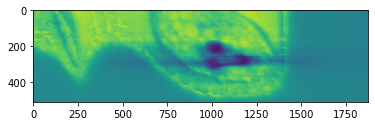

In [49]:
plt.imshow(data_crop_crop)

In [87]:
#Get the fft of this cropped image
data_crop_crop_2dfft = np.fft.rfft(data_crop_crop)

In [88]:
#Get the fft of the whole image
data_2dff = np.fft.rfft(data)

In [89]:
#Replace regions of the cropped data FFT with the whole image, only relevant parts
data_crop_crop_2dfft [4:10,:] = 0
data_crop_crop_2dfft [:,2:6] = 0

In [90]:
#FFT inverse to restore a filtered image
data_crop_crop_restore = np.fft.irfft(data_crop_crop_2dfft)

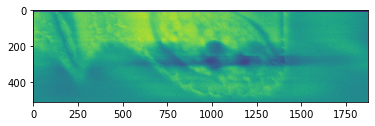

In [91]:
plt.imshow(data_crop_crop_restore)

Not really working

Try gaussian smoothing of resy

In [104]:
import skimage.filters
resy_smooth = skimage.filters.gaussian(resy[9,:,:], sigma=40)

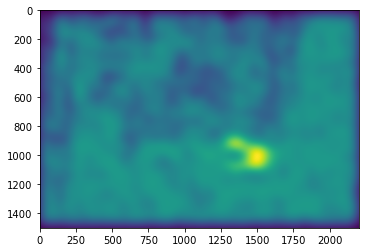

In [105]:
plt.imshow(resy_smooth)

In [110]:
#Get locations of maximum
print(resy_smooth.max())
print(resy_smooth.min())

0.006869132217140002
0.0001772259560786164


(array([  3850.,  11204.,  28342.,  40520.,  41005.,  42690.,  49666.,
         54581.,  67771., 119772., 190605., 246392., 315187., 339265.,
        369411., 442420., 627514., 212815.,  28491.,  11723.,   9485.,
          7842.,   6283.,   5684.,   5826.,   5886.,   4079.,   2596.,
          2416.,   2288.,   2189.,   2202.]),
 array([0.00017723, 0.00038635, 0.00059547, 0.00080459, 0.00101371,
        0.00122284, 0.00143196, 0.00164108, 0.0018502 , 0.00205932,
        0.00226845, 0.00247757, 0.00268669, 0.00289581, 0.00310493,
        0.00331406, 0.00352318, 0.0037323 , 0.00394142, 0.00415055,
        0.00435967, 0.00456879, 0.00477791, 0.00498703, 0.00519616,
        0.00540528, 0.0056144 , 0.00582352, 0.00603264, 0.00624177,
        0.00645089, 0.00666001, 0.00686913]),
 <BarContainer object of 32 artists>)

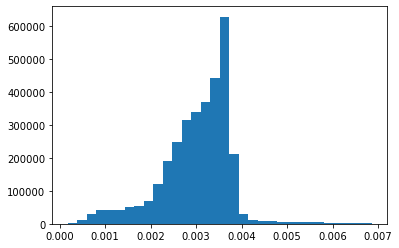

In [109]:
plt.hist(resy_smooth.flatten(),32)

In [115]:
resy_smooth_thres = resy_smooth- resy_smooth.min() > (resy_smooth.max()-resy_smooth.min())*0.6

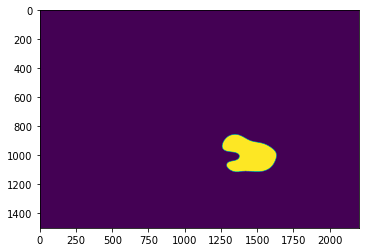

In [116]:
plt.imshow(resy_smooth_thres)

At these locations, try to process line-by-line by subtracting a multiple gaussian to the original image

In [117]:
data_gausss_subtr = np.copy(data_crop)

In [124]:
y_indices = np.sum(resy_smooth_thres, axis=1) >=1.0

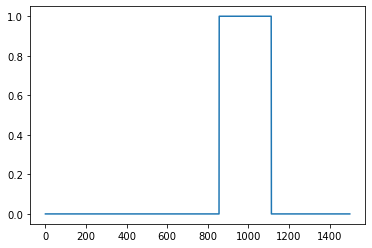

In [125]:
plt.plot(y_indices)

In [131]:
ix = np.arange(resy_smooth_thres.shape[1])
xavgpos = np.mean( ix* resy_smooth_thres, axis=1 )

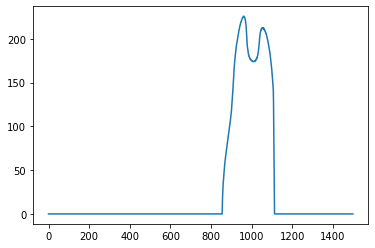

In [132]:
plt.plot(xavgpos)

In [152]:
import math
def gaussian_double(x, x0, a0, sigma0 , x1,a1,sigma1):
    #ampl /sigma/math.sqrt(2*math.pi) * np.exp(-0.5* (x-xmid)**2/sigma/sigma)
    gauss0 = a0/sigma0/math.sqrt(2*math.pi) * np.exp(-0.5*(x-x0)**2 / sigma0/sigma0 )
    gauss1 = a1/sigma1/math.sqrt(2*math.pi) * np.exp(-0.5*(x-x1)**2 / sigma1/sigma1 )
    return gauss0+gauss1

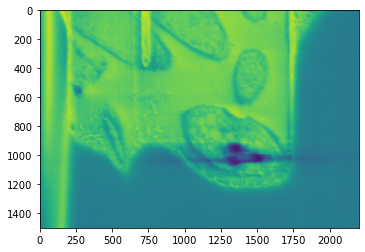

In [153]:
plt.imshow(data_crop)

In [154]:
#Test
iy=1000
dline = data_crop[iy,:]
ix = np.arange(dline.shape[0])

In [155]:
dline.dtype

dtype('uint8')

In [156]:
ix

array([   0,    1,    2, ..., 2197, 2198, 2199])

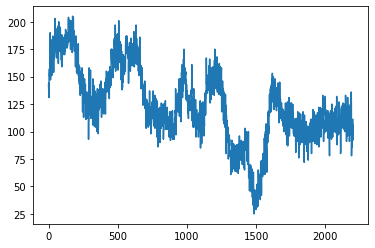

In [157]:
plt.plot(dline)

In [161]:
import scipy
v0 = xavgpos[iy]
v1 = xavgpos[iy]+30
popt , pcov = scipy.optimize.curve_fit ( gaussian_double, ix, dline, p0=[v0, -100, 30, v1 , -100, 30])

In [162]:
popt

array([ 1.24077536e+02,  6.06693561e+03,  6.01423581e+01, -6.44551347e+03,
        4.18429197e+06,  5.59473052e+03])

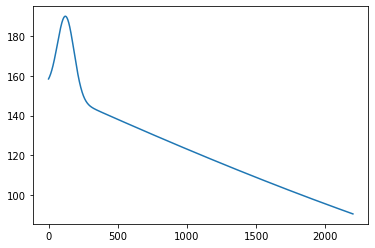

In [163]:
optres = gaussian_double(ix, popt[0],popt[1],popt[2] , popt[3],popt[4],popt[5])
plt.plot(optres)

Gaussian fitting is not working for a single line

In [ ]:
import scipy
for iy in range(0, data_gausss_subtr.shape[0]):
    if y_indices[iy]>0:
        dline = data_crop[iy,:]
        ix = np.arange(dline.shape[0])

        #Fit multiple gaussian, max 2 peaks
        popt , pcov = scipy.optimize.curve_fit ( gaussian_double, ix, dline, 
            p0=[xavgpos[iy], -1.0, 30,
            xavgpos[iy]+30 , -1.0, 30])
        
        
    